<a href="https://colab.research.google.com/github/gopichandchalla16/infosys-internship-real-time-industry-insight-system/blob/anshika-dev/Infosys_Industry_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 1 — Data Sourcing & Handling
# Project:
## Real-Time Industry Insight & Strategic Intelligence System
Goal of this notebook :
1. Collect company-related data from open internet sources
(Wikipedia, Google News RSS, Yahoo Finance).
2. Clean and structure the data into pandas DataFrames.
3. Run a simple sentiment analysis on textual data (simulated tweets + news headlines).
4. Visualize insights (bar chart + sentiment trend line).

## **1. Setup (install packages and imports)**

In [1]:
# Run this cell first in Colab
!pip install yfinance wikipedia feedparser textblob
# textblob may require NLTK corpora, download if needed (TextBlob auto-downloads some resources)
import pandas as pd
import numpy as np
import yfinance as yf
import wikipedia
import feedparser
from textblob import TextBlob
import matplotlib.pyplot as plt
from datetime import datetime
# Matplotlib nicer defaults for presentation
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.grid'] = True

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.5 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=1fa96cb45c2560a8af03d1263ec9d1a8ffd3bea98d8cfc7f3b3ae10bf373e825
  Stored in directory: /root/.cache/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=2d6c9af39b327b9ebfd387274a570780d213515cf14e2897a7171c5b807aa93e
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built wikipedia sgmllib3k


## **2. Data collection**

We will collect data from three public sources: -

Wikipedia: company summary and some sections

Google News RSS: recent headlines about the company

Yahoo Finance via yfinance : recent stock price history

## **2.1 Wikipedia company summary**

In [2]:
asset_name="TCS"
try:
   # Attempt to fetch summary by appending ' company' to the asset name
   try:
     wiki_summary = wikipedia.summary(f"{asset_name} company", sentences=5)
     print(" Wikipedia Summary:\n")
     print(wiki_summary)
   except wikipedia.exceptions.PageError:
      # If appending ' company' doesn't work, try the original asset name
      wiki_summary = wikipedia.summary(asset_name, sentences=5)
      print(" Wikipedia Summary:\n")
      print(wiki_summary)
except Exception as e:
  print(f"Could not fetch Wikipedia summary: {e}")

Could not fetch Wikipedia summary: "TVS" may refer to: 
Topological vector space
Television Sydney
Television South
TVS Television Network
TVS (Poland)
TVS (Russia)
TV Syd
Southern Television Guangdong
TVS (Venezuela)
Sistema Brasileiro de Televisão
Television Saitama
TVS (São Tomé and Príncipe)
TVS (Malaysian TV channel)
T. V. Sundram Iyengar
TVS Group
TVS Electronics
TVS Motor
Tangshan Sannühe Airport
Transvaginal ultrasound
Transient voltage suppressor
Transient-voltage-suppression diode
Triggered vacuum switch
Trinity Valley School
The Virgin Suicides
Tornado vortex signature
T. V. Sankaranarayanan


/usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


## **2.2 Google News RSS headlines**

We'll use Google News RSS search for Infosys and parse top items.

In [3]:
query = 'TCS'
rss_url = f'https://news.google.com/rss/search?q={query}'
feed = feedparser.parse(rss_url)
news_items = []
for entry in feed.entries[:30]: # get up to 30 headlines
  news_items.append({
    'title': entry.title,
    'published': entry.get('published',''),
    'link': entry.get('link','')
  })
news_df = pd.DataFrame(news_items)
news_df['published'] = pd.to_datetime(news_df['published'], errors='coerce')
news_df.head()

,title,published,link
0,Competitive swimmer running 2025 TCS NYC Marat...,2025-10-29 06:13:13,https://news.google.com/rss/articles/CBMixwFBV...
1,Marks & Spencer swaps out TCS for fresh helpde...,2025-10-28 08:30:00,https://news.google.com/rss/articles/CBMidkFVX...
2,M&S drops TCS IT service desk contract - TechR...,2025-10-28 14:37:28,https://news.google.com/rss/articles/CBMitgFBV...
3,TCS denies losing $1 billion Marks & Spencer c...,2025-10-27 10:16:05,https://news.google.com/rss/articles/CBMihwJBV...
4,2025 TCS New York City Marathon Race Week Phot...,2025-10-30 00:18:31,https://news.google.com/rss/articles/CBMinwFBV...


## **2.3 Yahoo Finance historical data**

We will download the recent 6 months of daily stock prices for Infosys. On Yahoo Finance, Infosys India
listing uses ticker INFY.NS.

In [4]:
ticker = 'TCS.NS'
stock = yf.Ticker(ticker)
hist = stock.history(period='6mo', interval='1d')
hist = hist.reset_index()
hist = hist[['Date','Open','High','Low','Close','Volume']]
hist.tail()

,Date,Open,High,Low,Close,Volume
122,2025-10-24 00:00:00+05:30,3080.000000,3090.000000,3058.300049,3063.199951,2684318
123,2025-10-27 00:00:00+05:30,3066.500000,3094.199951,3060.199951,3084.899902,1946312
124,2025-10-28 00:00:00+05:30,3076.000000,3090.199951,3040.199951,3057.899902,3470737
125,2025-10-29 00:00:00+05:30,3057.899902,3076.000000,3046.100098,3057.600098,2895420
126,2025-10-30 00:00:00+05:30,3049.100098,3063.800049,3032.800049,3035.300049,2240614


## **2.4 Simulated tweets (for sentiment demo)**

We'll create a small set of synthetic tweets that reflect a mixture of positive, negative, and neutral
opinions about Infosys. In a production system we'd replace this with real tweets collected through
Twitter API or other social scraping (following the platform's terms of service).

In [5]:
simulated_tweets = [
  "Infosys reports strong quarterly results, growth beats estimates. Proud of the team!",
  "Concerned about the slowdown in digital orders — revenues may be under pressure.",
  "Amazing client wins announced today by Infosys. Great execution!",
  "CEO commentary is vague; investors are disappointed.",
  "Infosys stock is showing steady recovery after recent dip.",
  "Layoffs rumors spreading — morale may be affected.",
  "New sustainability initiative by Infosys is commendable.",
  "Not impressed with the latest earnings call — guidance is weak.",
  "Partnership with XYZ could open large opportunities.",
  "Mixed signals from the boardroom, watch carefully."
]
tweets_df = pd.DataFrame({'text': simulated_tweets})
tweets_df.head()

,text
0,"Infosys reports strong quarterly results, grow..."
1,Concerned about the slowdown in digital orders...
2,Amazing client wins announced today by Infosys...
3,CEO commentary is vague; investors are disappo...
4,Infosys stock is showing steady recovery after...


## **3. Preprocessing & Cleaning**

We'll ensure text is cleaned (lowercase, trimmed) and remove obvious duplicates or empty items. For
news titles and simulated tweets we compute a simple sentiment score (polarity) using TextBlob.

In [6]:
# Basic cleaning helper
import re
def clean_text(s):
  if not isinstance(s, str):
    return ''
  s = s.strip()
  s = re.sub(r'\s+', ' ', s)
  return s
# Clean news titles
news_df['title_clean'] = news_df['title'].apply(clean_text)
news_df = news_df[news_df['title_clean'] !=''].drop_duplicates(subset=['title_clean']).reset_index(drop=True)
# Clean tweets
tweets_df['text_clean'] = tweets_df['text'].apply(clean_text)
# Show counts
print(f"News headlines collected: {len(news_df)}")
print(f"Simulated tweets: {len(tweets_df)}")

News headlines collected: 30
Simulated tweets: 10


## **3.1 Sentiment scoring with TextBlob**

TextBlob returns a polarity score between -1 (negative) and +1 (positive). We'll compute polarity for each
text item and use it as our sentiment metric.

In [7]:
def sentiment_polarity(text):
  try:
    return TextBlob(text).sentiment.polarity
  except Exception:
    return np.nan
# News sentiment
news_df['sentiment'] = news_df['title_clean'].apply(sentiment_polarity)
# Tweets sentiment
tweets_df['sentiment'] = tweets_df['text_clean'].apply(sentiment_polarity)
# Quick view
print('--- News sentiment sample ---')
print(news_df[['title_clean','sentiment']].head())
print('\n--- Tweets sentiment sample ---')
print(tweets_df[['text_clean','sentiment']])

--- News sentiment sample ---
                                         title_clean  sentiment
0  Competitive swimmer running 2025 TCS NYC Marat...   0.136364
1  Marks & Spencer swaps out TCS for fresh helpde...   0.300000
2  M&S drops TCS IT service desk contract - TechR...   0.000000
3  TCS denies losing $1 billion Marks & Spencer c...   0.000000
4  2025 TCS New York City Marathon Race Week Phot...   0.136364

--- Tweets sentiment sample ---
                                          text_clean  sentiment
0  Infosys reports strong quarterly results, grow...   0.716667
1  Concerned about the slowdown in digital orders...   0.000000
2  Amazing client wins announced today by Infosys...   0.633333
3  CEO commentary is vague; investors are disappo...  -0.625000
4  Infosys stock is showing steady recovery after...   0.083333
5  Layoffs rumors spreading — morale may be affec...   0.000000
6  New sustainability initiative by Infosys is co...   0.136364
7  Not impressed with the latest earnings

## **4. Combine sources into a single dataframe for analysis**

We'll create a unified content_df with columns: `source` , `text` , `published`, `sentiment` .

In [8]:
# Prepare news entries
news_for_analysis = news_df[['title_clean','published','sentiment']].copy()
news_for_analysis.columns = ['text','published','sentiment']
news_for_analysis['source'] = 'news'
# Prepare tweets entries (no published timestamps, create incremental times)
tweets_for_analysis = tweets_df[['text_clean','sentiment']].copy()
tweets_for_analysis.columns = ['text','sentiment']
# create synthetic timestamps for tweets (latest = now)
now = datetime.now()
minutes = np.arange(len(tweets_for_analysis))[::-1]*60
# spread them by 1 hour
tweets_for_analysis['published'] = [now - pd.Timedelta(minutes=int(m)) for m in minutes]
tweets_for_analysis['source'] = 'simulated_tweet'
# Combine
content_df = pd.concat([news_for_analysis,
tweets_for_analysis[['text','published','sentiment','source']]],
ignore_index=True)
content_df = content_df.sort_values('published').reset_index(drop=True)
content_df.head(10)

,text,published,sentiment,source
0,PRE-TCS NEW YORK CITY MARATHON CELEBRATION pre...,2025-10-24 17:30:45,0.136364,news
1,New York Road Runners host free youth event in...,2025-10-26 17:33:17,0.168182,news
2,Marks & Spencer Ends IT Service Desk Contract ...,2025-10-26 17:40:25,-0.500000,news
3,"M&S ends contract with TCS after cyberattack, ...",2025-10-27 09:16:00,0.000000,news
4,M&S ends contract with TCS after £300m cyberat...,2025-10-27 10:04:46,0.000000,news
5,TCS denies losing $1 billion Marks & Spencer c...,2025-10-27 10:16:05,0.000000,news
6,Tata Consultancy Services Refutes Losing M&S C...,2025-10-27 11:30:00,0.000000,news
7,2025 TCS New York City Marathon Entry List - F...,2025-10-27 15:48:34,0.136364,news
8,2025 TCS New York City Marathon Kids Kickoff R...,2025-10-27 18:09:48,0.136364,news
9,Marks & Spencer swaps out TCS for fresh helpde...,2025-10-28 08:30:00,0.300000,news


## **5. Exploratory analysis & Visualizations**

## **5.1 Basic statistics**

In [9]:
print('Overall sentiment stats:')
print(content_df['sentiment'].describe())
# Average sentiment per source
avg_sentiment = content_df.groupby('source')['sentiment'].mean().reset_index()
avg_sentiment

Overall sentiment stats:
count    40.000000
mean      0.064733
std       0.214870
min      -0.625000
25%       0.000000
50%       0.034091
75%       0.136364
max       0.716667
Name: sentiment, dtype: float64


,source,sentiment
0,news,0.057083
1,simulated_tweet,0.087684


## **5.2 Visualization 1 — Bar chart: Average sentiment by source**

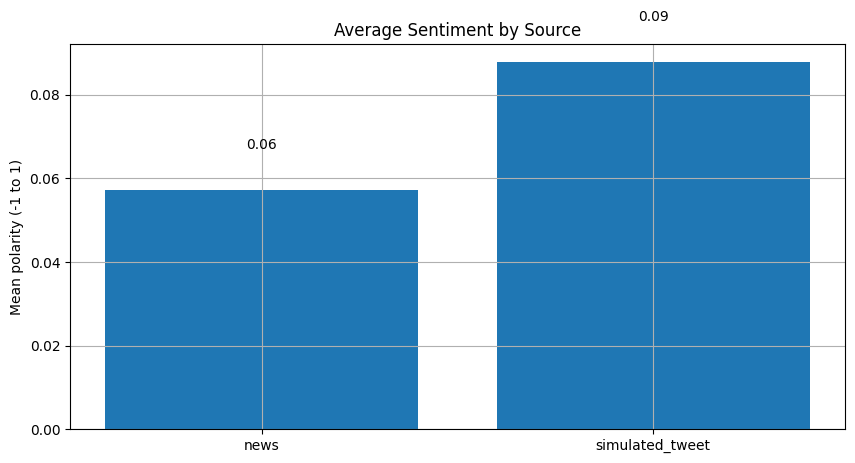

In [10]:
fig, ax = plt.subplots()
ax.bar(avg_sentiment['source'], avg_sentiment['sentiment'])
ax.set_title('Average Sentiment by Source')
ax.set_ylabel('Mean polarity (-1 to 1)')
for i, v in enumerate(avg_sentiment['sentiment']):
  ax.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

## **5.3 Visualization 2 — Line chart: Sentiment trend over time (combined)**

Plot sentiment points over time to see trends. We'll use a rolling average to smooth the line.

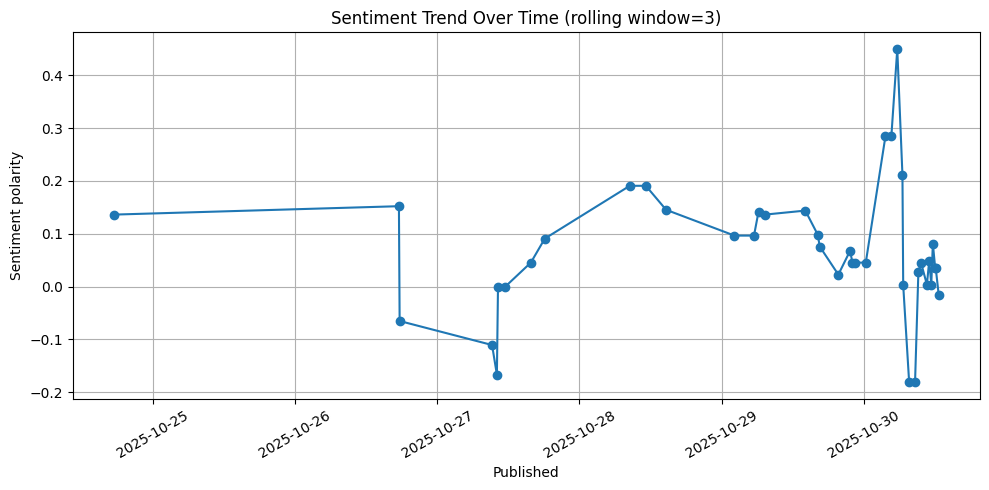

In [11]:
plot_df = content_df.copy()
plot_df = plot_df.sort_values('published')
plot_df['sentiment_rolling'] = plot_df['sentiment'].rolling(window=3,min_periods=1).mean()
fig, ax = plt.subplots()
ax.plot(plot_df['published'], plot_df['sentiment_rolling'], marker='o')
ax.set_title('Sentiment Trend Over Time (rolling window=3)')
ax.set_xlabel('Published')
ax.set_ylabel('Sentiment polarity')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## **5.4 Optional visualization: Stock price (Close) vs time**

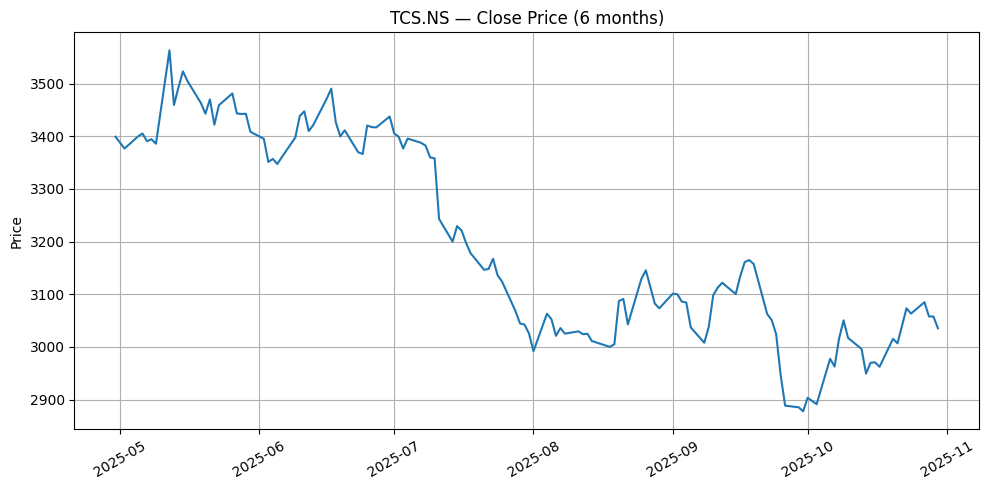

In [12]:
fig, ax = plt.subplots()
ax.plot(hist['Date'], hist['Close'], label='Close Price')
ax.set_title(f'{ticker} — Close Price (6 months)')
ax.set_ylabel('Price')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()